In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

from imblearn.over_sampling import RandomOverSampler

from sklearn.gaussian_process.kernels import RBF
import time
kernel = 1.0 * RBF(1.0)

import tensorflow as tf
import keras
#import keras_metrics
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
import time

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

from sklearn import metrics

tf.random.set_seed(123)

!pip install h2o
import h2o
h2o.init()
from h2o.model.segment_models import H2OFrame
from h2o.automl import H2OAutoML
print("All Library Loaded")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,3 hours 40 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_unknownUser_1j6k6g
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


All Library Loaded


In [ ]:
df  = pd.read_csv("/content/drive/MyDrive/heart.csv")

for i in range(len(df.columns)):
  if i != 0 and i != 3 and i != 4 and i != 7 and i != 9:
    df.iloc[:,i] = df.iloc[:,i].astype('category')
  
df_td = df.copy()
X = df_td.iloc[:,0:-1].copy()
Y = df_td['target'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

#df.head()

In [ ]:
#df  = pd.read_csv("/content/drive/MyDrive/heart.csv")
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [ ]:
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

In [ ]:
526+499

1025

In [ ]:
#KNN, SVM, LR, GP

In [ ]:
#X = df_td.iloc[:,0:-1].copy()
#Y = df_td['target'].copy()
#X = X.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [ ]:
"""
estimators = list(range(1, 20))
accuracytest = []
accuracytrain = []

for n_estimators in estimators:
    clf = KNeighborsClassifier(n_neighbors=n_estimators,p=2,n_jobs=4,
                               weights='uniform').fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    accuracytest.append(acc)
    acc = clf.score(X_train, y_train)
    accuracytrain.append(acc)

plt.plot(estimators, accuracytrain, label="train_accuracy")
plt.plot(estimators, accuracytest, label="test_accuracy")
plt.plot(estimators, (pd.DataFrame(accuracytrain) - pd.DataFrame(accuracytest)), label="difference_between_train_and_test_accuracy")
plt.plot(estimators, np.zeros(len(estimators)), label="zero_line")
plt.title("KNeighborsClassifier")
plt.xlabel("Number of neighbours")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()
"""

'\nestimators = list(range(1, 20))\naccuracytest = []\naccuracytrain = []\n\nfor n_estimators in estimators:\n    clf = KNeighborsClassifier(n_neighbors=n_estimators,p=2,n_jobs=4,\n                               weights=\'uniform\').fit(X_train, y_train)\n    acc = clf.score(X_test, y_test)\n    accuracytest.append(acc)\n    acc = clf.score(X_train, y_train)\n    accuracytrain.append(acc)\n\nplt.plot(estimators, accuracytrain, label="train_accuracy")\nplt.plot(estimators, accuracytest, label="test_accuracy")\nplt.plot(estimators, (pd.DataFrame(accuracytrain) - pd.DataFrame(accuracytest)), label="difference_between_train_and_test_accuracy")\nplt.plot(estimators, np.zeros(len(estimators)), label="zero_line")\nplt.title("KNeighborsClassifier")\nplt.xlabel("Number of neighbours")\nplt.ylabel("Accuracy")\nplt.legend(loc=\'best\')\nplt.show()\n'

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
NTr = neigh.score(X_train, y_train)
NTe = neigh.score(X_test, y_test)
print("train accuracy: ",NTr)
print("test accuracy: ",NTe)

train accuracy:  0.7621951219512195
test accuracy:  0.7609756097560976


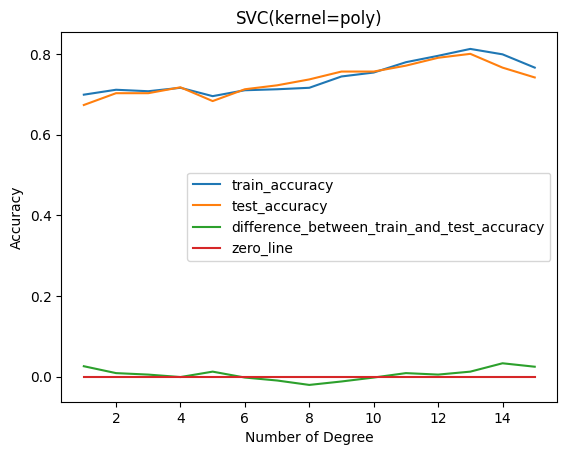

In [ ]:

estimators = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
#estimators = ['poly', 'rbf', 'sigmoid']
accuracytest = []
accuracytrain = []

for n_estimators in estimators:
    clf = SVC(kernel = "poly",degree=n_estimators,
              random_state=123,
              probability=True).fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    accuracytest.append(acc)
    acc = clf.score(X_train, y_train)
    accuracytrain.append(acc)

plt.plot(estimators, accuracytrain, label="train_accuracy")
plt.plot(estimators, accuracytest, label="test_accuracy")
plt.plot(estimators, (pd.DataFrame(accuracytrain) - pd.DataFrame(accuracytest)), label="difference_between_train_and_test_accuracy")
plt.plot(estimators, np.zeros(len(estimators)), label="zero_line")
plt.title("SVC(kernel=poly)")
plt.xlabel("Number of Degree")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()


In [ ]:
"""
estimators = [5,10,15,20,25,30,35,40,45]
#estimators = ['poly', 'rbf', 'sigmoid']
accuracytest = []
accuracytrain = []

for n_estimators in estimators:
    clf = SVC(C = n_estimators ,kernel = "poly",degree=10,
              random_state=123,
              probability=True).fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    accuracytest.append(acc)
    acc = clf.score(X_train, y_train)
    accuracytrain.append(acc)

plt.plot(estimators, accuracytrain, label="train_accuracy")
plt.plot(estimators, accuracytest, label="test_accuracy")
plt.plot(estimators, (pd.DataFrame(accuracytrain) - pd.DataFrame(accuracytest)), label="difference_between_train_and_test_accuracy")
plt.plot(estimators, np.zeros(len(estimators)), label="zero_line")
plt.title("SVC(kernel=poly, degree = 10)")
plt.xlabel("Number of C")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()
"""

'\nestimators = [5,10,15,20,25,30,35,40,45]\n#estimators = [\'poly\', \'rbf\', \'sigmoid\']\naccuracytest = []\naccuracytrain = []\n\nfor n_estimators in estimators:\n    clf = SVC(C = n_estimators ,kernel = "poly",degree=10,\n              random_state=123,\n              probability=True).fit(X_train, y_train)\n    acc = clf.score(X_test, y_test)\n    accuracytest.append(acc)\n    acc = clf.score(X_train, y_train)\n    accuracytrain.append(acc)\n\nplt.plot(estimators, accuracytrain, label="train_accuracy")\nplt.plot(estimators, accuracytest, label="test_accuracy")\nplt.plot(estimators, (pd.DataFrame(accuracytrain) - pd.DataFrame(accuracytest)), label="difference_between_train_and_test_accuracy")\nplt.plot(estimators, np.zeros(len(estimators)), label="zero_line")\nplt.title("SVC(kernel=poly, degree = 10)")\nplt.xlabel("Number of C")\nplt.ylabel("Accuracy")\nplt.legend(loc=\'best\')\nplt.show()\n'

In [ ]:
"""
#estimators = [5,10,15,20,25,30,35,40,45]
estimators = ['poly', 'rbf', 'sigmoid']
accuracytest = []
accuracytrain = []

for n_estimators in estimators:
    clf = SVC(C = 40 ,kernel = n_estimators,degree=10,
              random_state=123,
              probability=True).fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    accuracytest.append(acc)
    acc = clf.score(X_train, y_train)
    accuracytrain.append(acc)

plt.plot(estimators, accuracytrain, label="train_accuracy")
plt.plot(estimators, accuracytest, label="test_accuracy")
plt.plot(estimators, (pd.DataFrame(accuracytrain) - pd.DataFrame(accuracytest)), label="difference_between_train_and_test_accuracy")
plt.plot(estimators, np.zeros(len(estimators)), label="zero_line")
plt.title("SVC(C=40kernel=poly, degree = 10)")
plt.xlabel("kernels")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()
"""

'\n#estimators = [5,10,15,20,25,30,35,40,45]\nestimators = [\'poly\', \'rbf\', \'sigmoid\']\naccuracytest = []\naccuracytrain = []\n\nfor n_estimators in estimators:\n    clf = SVC(C = 40 ,kernel = n_estimators,degree=10,\n              random_state=123,\n              probability=True).fit(X_train, y_train)\n    acc = clf.score(X_test, y_test)\n    accuracytest.append(acc)\n    acc = clf.score(X_train, y_train)\n    accuracytrain.append(acc)\n\nplt.plot(estimators, accuracytrain, label="train_accuracy")\nplt.plot(estimators, accuracytest, label="test_accuracy")\nplt.plot(estimators, (pd.DataFrame(accuracytrain) - pd.DataFrame(accuracytest)), label="difference_between_train_and_test_accuracy")\nplt.plot(estimators, np.zeros(len(estimators)), label="zero_line")\nplt.title("SVC(C=40kernel=poly, degree = 10)")\nplt.xlabel("kernels")\nplt.ylabel("Accuracy")\nplt.legend(loc=\'best\')\nplt.show()\n'

In [ ]:
svc = SVC(C = 40, kernel = "poly",degree = 10,
          random_state=123, probability=True).fit(X_train, y_train)
STr = svc.score(X_train, y_train)
STe = svc.score(X_test, y_test)
print("train accuracy: ",STr)
print("test accuracy: ",STe)

train accuracy:  0.8475609756097561
test accuracy:  0.8390243902439024


In [ ]:
LR = LogisticRegression(penalty="l2",
                        max_iter=1000,random_state=123).fit(X_train, y_train)
LTr = LR.score(X_train, y_train)
LTe = LR.score(X_test, y_test)
print("train accuracy: ",LTr)
print("test accuracy: ",LTe)

train accuracy:  0.8548780487804878
test accuracy:  0.8780487804878049


In [ ]:
LR

LogisticRegression(max_iter=1000, random_state=123)

In [ ]:
#DT, ANN, Ensemble
from sklearn import tree

In [ ]:
"""
DT = DecisionTreeClassifier(random_state=123).fit(X_train, y_train)
#DT = DecisionTreeClassifier(random_state=123,max_depth=4,max_features='sqrt',splitter = "random",ccp_alpha = 0.01).fit(X_train, y_train)
DTr = DT.score(X_train, y_train)
DTe = DT.score(X_test, y_test)
print("train accuracy: ",DTr)
print("test accuracy: ",DTe)
path = DT.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = (ccp_alphas.round(5))
impurities = (impurities.round(5))
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1],impurities[:-1],marker = 'o',drawstyle = "steps-post")
plt.title("DecisionTreeClassifier(default_hyperparameters)")
ax.set_xlabel("alpha")
ax.set_ylabel("impurities")
plt.show()
"""

'\nDT = DecisionTreeClassifier(random_state=123).fit(X_train, y_train)\n#DT = DecisionTreeClassifier(random_state=123,max_depth=4,max_features=\'sqrt\',splitter = "random",ccp_alpha = 0.01).fit(X_train, y_train)\nDTr = DT.score(X_train, y_train)\nDTe = DT.score(X_test, y_test)\nprint("train accuracy: ",DTr)\nprint("test accuracy: ",DTe)\npath = DT.cost_complexity_pruning_path(X_train, y_train)\nccp_alphas, impurities = path.ccp_alphas, path.impurities\nccp_alphas = (ccp_alphas.round(5))\nimpurities = (impurities.round(5))\nfig, ax = plt.subplots()\nax.plot(ccp_alphas[:-1],impurities[:-1],marker = \'o\',drawstyle = "steps-post")\nplt.title("DecisionTreeClassifier(default_hyperparameters)")\nax.set_xlabel("alpha")\nax.set_ylabel("impurities")\nplt.show()\n'

In [ ]:
#tree.plot_tree(DT)

In [ ]:

#DT = DecisionTreeClassifier(random_state=123).fit(X_train, y_train)
DT = DecisionTreeClassifier(random_state=123,max_depth=5,
                            max_features='sqrt',
                            splitter = "random",
                            ccp_alpha = 0.02).fit(X_train, y_train)
DTr = DT.score(X_train, y_train)
DTe = DT.score(X_test, y_test)
print("train accuracy: ",DTr)
print("test accuracy: ",DTe)
"""
path = DT.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = (ccp_alphas.round(5))
impurities = (impurities.round(5))
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1],impurities[:-1],marker = 'o',drawstyle = "steps-post")
plt.title("DecisionTreeClassifier(ccp_alpha = 0.02)")
ax.set_xlabel("alpha")
ax.set_ylabel("impurities")
plt.show()
"""


train accuracy:  0.75
test accuracy:  0.7463414634146341


'\npath = DT.cost_complexity_pruning_path(X_train, y_train)\nccp_alphas, impurities = path.ccp_alphas, path.impurities\nccp_alphas = (ccp_alphas.round(5))\nimpurities = (impurities.round(5))\nfig, ax = plt.subplots()\nax.plot(ccp_alphas[:-1],impurities[:-1],marker = \'o\',drawstyle = "steps-post")\nplt.title("DecisionTreeClassifier(ccp_alpha = 0.02)")\nax.set_xlabel("alpha")\nax.set_ylabel("impurities")\nplt.show()\n'

In [ ]:
#tree.plot_tree(DT)

In [ ]:
#df_td.iloc[:,0:-1]

In [ ]:
Tac = []
#Tpr = []
#Tre = []
teac = []
tepr = []
tere = []
sc = StandardScaler()
for i in range(1):
  X = df_td.iloc[:,0:-1].copy()
  X = sc.fit_transform(X)
  y = df_td['target'].copy()
  encoder = LabelEncoder()
  encoder.fit(y)
  y = encoder.transform(y)
  ##y = to_categorical(y)
  X_traink,X_testk,y_traink,y_testk = train_test_split(X, y ,test_size = 0.2, random_state=123)
  X_testkk,X_val,y_testkk,y_val = train_test_split(X_testk, y_testk ,test_size = 0.5, random_state=123)
  
  #X_traink = sc.fit_transform(X_traink)
  #X_testk  = sc.fit_transform(X_testk)
  #X_val  = sc.fit_transform(X_val)
  model = Sequential()
  model.add(Dense(13, activation='relu', input_shape=(X_traink.shape[1],)))
  model.add(Dense(13, activation='selu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='BinaryCrossentropy', optimizer='Adam', metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
  start_time = time.time()
  model.fit(X_traink,y_traink, batch_size = 64, epochs = 20, validation_data = (X_val,y_val),)
  end_time = time.time()

  ATr = model.evaluate(X_traink,y_traink,verbose=0)#[1]
  ATe = model.evaluate(X_testkk,y_testkk,verbose=0)#[1]

  Tac.append(ATr[1])
  #Tpr.append(ATr[2])
  #Tre.append(ATr[3])

  teac.append(ATe[1])
  tepr.append(ATe[2])
  tere.append(ATe[3])



print(ATr,ATe)

Epoch 1/20
13/13 [==============================] - 2s 43ms/step - loss: 0.7592 - accuracy: 0.4524 - precision_5: 0.4483 - recall_5: 0.2447 - val_loss: 0.7241 - val_accuracy: 0.5049 - val_precision_5: 0.4872 - val_recall_5: 0.3800
Epoch 2/20
13/13 [==============================] - 0s 8ms/step - loss: 0.7011 - accuracy: 0.5305 - precision_5: 0.5625 - recall_5: 0.4235 - val_loss: 0.6787 - val_accuracy: 0.5437 - val_precision_5: 0.5333 - val_recall_5: 0.4800
Epoch 3/20
13/13 [==============================] - 0s 8ms/step - loss: 0.6613 - accuracy: 0.5829 - precision_5: 0.5990 - recall_5: 0.5906 - val_loss: 0.6445 - val_accuracy: 0.6117 - val_precision_5: 0.5926 - val_recall_5: 0.6400
Epoch 4/20
13/13 [==============================] - 0s 9ms/step - loss: 0.6293 - accuracy: 0.6768 - precision_5: 0.6681 - recall_5: 0.7482 - val_loss: 0.6136 - val_accuracy: 0.6796 - val_precision_5: 0.6441 - val_recall_5: 0.7600
Epoch 5/20
13/13 [==============================] - 0s 21ms/step - loss: 0.5979

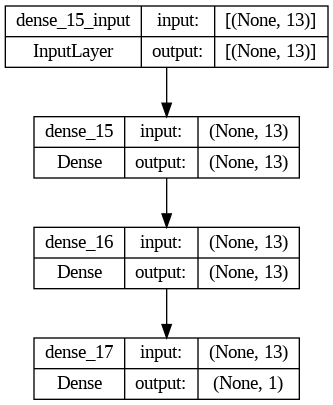

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

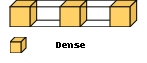

In [ ]:
import visualkeras
visualkeras.layered_view(model, legend=True,
                         draw_volume=True,spacing=30)

In [ ]:
"""
estimators = list(range(1, 150))
accuracytest = []
accuracytrain = []

for n_estimators in estimators:
    clf = BaggingClassifier(DecisionTreeClassifier(random_state=123,
                            max_depth=4,max_features='sqrt',
                            splitter = "random",
                            ccp_alpha = 0.01),n_estimators=n_estimators, max_samples=150, max_features=3,random_state=123).fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    accuracytest.append(acc)
    acc = clf.score(X_train, y_train)
    accuracytrain.append(acc)

plt.plot(estimators, accuracytrain, label="train_accuracy")
plt.plot(estimators, accuracytest, label="test_accuracy")
plt.plot(estimators, (pd.DataFrame(accuracytrain) - pd.DataFrame(accuracytest)), label="difference_between_train_and_test_accuracy")
plt.plot(estimators, np.zeros(len(estimators)), label="zero_line")
plt.title("BaggingClassifierDecisionTreeClassifier")
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()
"""

'\nestimators = list(range(1, 150))\naccuracytest = []\naccuracytrain = []\n\nfor n_estimators in estimators:\n    clf = BaggingClassifier(DecisionTreeClassifier(random_state=123,\n                            max_depth=4,max_features=\'sqrt\',\n                            splitter = "random",\n                            ccp_alpha = 0.01),n_estimators=n_estimators, max_samples=150, max_features=3,random_state=123).fit(X_train, y_train)\n    acc = clf.score(X_test, y_test)\n    accuracytest.append(acc)\n    acc = clf.score(X_train, y_train)\n    accuracytrain.append(acc)\n\nplt.plot(estimators, accuracytrain, label="train_accuracy")\nplt.plot(estimators, accuracytest, label="test_accuracy")\nplt.plot(estimators, (pd.DataFrame(accuracytrain) - pd.DataFrame(accuracytest)), label="difference_between_train_and_test_accuracy")\nplt.plot(estimators, np.zeros(len(estimators)), label="zero_line")\nplt.title("BaggingClassifierDecisionTreeClassifier")\nplt.xlabel("Number of estimators")\nplt.ylab

In [ ]:
BDT = BaggingClassifier(DecisionTreeClassifier(random_state=123,
                            max_depth=4,max_features='sqrt',
                            splitter = "random",
                            ccp_alpha = 0.01),n_estimators=100, max_samples=150, max_features=3,random_state=123).fit(X_train, y_train)
BDTr = BDT.score(X_train, y_train)
BDTe = BDT.score(X_test, y_test)
#tree.plot_tree(BDT)
print("train accuracy: ",BDTr)
print("test accuracy: ",BDTe)

train accuracy:  0.8560975609756097
test accuracy:  0.8536585365853658


In [ ]:
40.49+44.88

85.37

In [ ]:
"""
estimators = list(range(1, 150))
accuracytest = []
accuracytrain = []

for n_estimators in estimators:
    clf = BaggingClassifier(KNeighborsClassifier(n_neighbors=10),n_estimators=n_estimators, max_samples=150, max_features=3,random_state=123).fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    accuracytest.append(acc)
    acc = clf.score(X_train, y_train)
    accuracytrain.append(acc)

plt.plot(estimators, accuracytrain, label="train_accuracy")
plt.plot(estimators, accuracytest, label="test_accuracy")
plt.plot(estimators, (pd.DataFrame(accuracytrain) - pd.DataFrame(accuracytest)), label="difference_between_train_and_test_accuracy")
plt.plot(estimators, np.zeros(len(estimators)), label="zero_line")
plt.title("BaggingClassifierKNeighborsClassifier")
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()
"""

'\nestimators = list(range(1, 150))\naccuracytest = []\naccuracytrain = []\n\nfor n_estimators in estimators:\n    clf = BaggingClassifier(KNeighborsClassifier(n_neighbors=10),n_estimators=n_estimators, max_samples=150, max_features=3,random_state=123).fit(X_train, y_train)\n    acc = clf.score(X_test, y_test)\n    accuracytest.append(acc)\n    acc = clf.score(X_train, y_train)\n    accuracytrain.append(acc)\n\nplt.plot(estimators, accuracytrain, label="train_accuracy")\nplt.plot(estimators, accuracytest, label="test_accuracy")\nplt.plot(estimators, (pd.DataFrame(accuracytrain) - pd.DataFrame(accuracytest)), label="difference_between_train_and_test_accuracy")\nplt.plot(estimators, np.zeros(len(estimators)), label="zero_line")\nplt.title("BaggingClassifierKNeighborsClassifier")\nplt.xlabel("Number of estimators")\nplt.ylabel("Accuracy")\nplt.legend(loc=\'best\')\nplt.show()\n'

In [ ]:
BKNN = BaggingClassifier(KNeighborsClassifier(n_neighbors=10),
                         n_estimators=16,max_samples=150,
                         max_features=3,
                         random_state=123).fit(X_train, y_train)
BKTr = BKNN.score(X_train, y_train)
BKTe = BKNN.score(X_test, y_test)
print("train accuracy: ",BKTr)
print("test accuracy: ",BKTe)

train accuracy:  0.8085365853658537
test accuracy:  0.8048780487804879


In [ ]:
"""
estimators = list(range(1, 150))
accuracytest = []
accuracytrain = []

for n_estimators in estimators:
    clf = BaggingClassifier(GaussianProcessClassifier(),n_estimators=n_estimators, max_samples=150, max_features=3,random_state=123).fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    accuracytest.append(acc)
    acc = clf.score(X_train, y_train)
    accuracytrain.append(acc)

plt.plot(estimators, accuracytrain, label="train_accuracy")
plt.plot(estimators, accuracytest, label="test_accuracy")
plt.plot(estimators, (pd.DataFrame(accuracytrain) - pd.DataFrame(accuracytest)), label="difference_between_train_and_test_accuracy")
plt.plot(estimators, np.zeros(len(estimators)), label="zero_line")
plt.title("BaggingClassifierGaussianProcessClassifier")
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()
"""

'\nestimators = list(range(1, 150))\naccuracytest = []\naccuracytrain = []\n\nfor n_estimators in estimators:\n    clf = BaggingClassifier(GaussianProcessClassifier(),n_estimators=n_estimators, max_samples=150, max_features=3,random_state=123).fit(X_train, y_train)\n    acc = clf.score(X_test, y_test)\n    accuracytest.append(acc)\n    acc = clf.score(X_train, y_train)\n    accuracytrain.append(acc)\n\nplt.plot(estimators, accuracytrain, label="train_accuracy")\nplt.plot(estimators, accuracytest, label="test_accuracy")\nplt.plot(estimators, (pd.DataFrame(accuracytrain) - pd.DataFrame(accuracytest)), label="difference_between_train_and_test_accuracy")\nplt.plot(estimators, np.zeros(len(estimators)), label="zero_line")\nplt.title("BaggingClassifierGaussianProcessClassifier")\nplt.xlabel("Number of estimators")\nplt.ylabel("Accuracy")\nplt.legend(loc=\'best\')\nplt.show()\n'

In [ ]:
BGPC = BaggingClassifier(GaussianProcessClassifier(),n_estimators=150, max_samples=150, max_features=3,random_state=123).fit(X_train, y_train)
BGTr = BGPC.score(X_train, y_train)
BGTe = BGPC.score(X_test, y_test)
print("train accuracy: ",BGTr)
print("test accuracy: ",BGTe)

train accuracy:  0.9170731707317074
test accuracy:  0.9073170731707317


In [ ]:
"""
estimators = list(range(1, 150))
accuracytest = []
accuracytrain = []

for n_estimators in estimators:
    clf = BaggingClassifier(SVC(kernel = "poly",random_state=123),n_estimators=n_estimators, max_samples=150, max_features=3,random_state=123).fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    accuracytest.append(acc)
    acc = clf.score(X_train, y_train)
    accuracytrain.append(acc)

plt.plot(estimators, accuracytrain, label="train_accuracy")
plt.plot(estimators, accuracytest, label="test_accuracy")
plt.plot(estimators, (pd.DataFrame(accuracytrain) - pd.DataFrame(accuracytest)), label="difference_between_train_and_test_accuracy")
plt.plot(estimators, np.zeros(len(estimators)), label="zero_line")
plt.title("BaggingClassifierSVC")
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()
"""

'\nestimators = list(range(1, 150))\naccuracytest = []\naccuracytrain = []\n\nfor n_estimators in estimators:\n    clf = BaggingClassifier(SVC(kernel = "poly",random_state=123),n_estimators=n_estimators, max_samples=150, max_features=3,random_state=123).fit(X_train, y_train)\n    acc = clf.score(X_test, y_test)\n    accuracytest.append(acc)\n    acc = clf.score(X_train, y_train)\n    accuracytrain.append(acc)\n\nplt.plot(estimators, accuracytrain, label="train_accuracy")\nplt.plot(estimators, accuracytest, label="test_accuracy")\nplt.plot(estimators, (pd.DataFrame(accuracytrain) - pd.DataFrame(accuracytest)), label="difference_between_train_and_test_accuracy")\nplt.plot(estimators, np.zeros(len(estimators)), label="zero_line")\nplt.title("BaggingClassifierSVC")\nplt.xlabel("Number of estimators")\nplt.ylabel("Accuracy")\nplt.legend(loc=\'best\')\nplt.show()\n'

In [ ]:
BSVC = BaggingClassifier(SVC(kernel = "poly",random_state=123),
                         n_estimators=50, max_samples=150, 
                         max_features=3,
                         random_state=123).fit(X_train, y_train)
BSTr = BSVC.score(X_train, y_train)
BSTe = BSVC.score(X_test, y_test)
print("train accuracy: ",BSTr)
print("test accuracy: ",BSTe)

train accuracy:  0.7182926829268292
test accuracy:  0.7024390243902439


In [ ]:
#df  = pd.read_csv("/content/drive/MyDrive/heart.csv")

#for i in range(len(df.columns)):
#  if i != 0 and i != 3 and i != 4 and i != 7 and i != 9:
#    df.iloc[:,i] = df.iloc[:,i].astype('category')
  
#df_td = df.copy()

#train, test= train_test_split(df_td, test_size=0.2, random_state=444)
#train, valid= train_test_split(test, test_size=0.5, random_state=444)

In [ ]:
path = ["/content/drive/MyDrive/HeartDisease/GBM_3_AutoML_1_20230408_140006", 
        "/content/drive/MyDrive/HeartDisease/GBM_3_AutoML_3_20230408_171943"]
best_model = h2o.load_model(path[1])

df_h2o = df.copy()        
train, test = train_test_split(df_h2o, test_size=0.2, random_state=123)
#test , valid = train_test_split(test, test_size=0.5, random_state=123)
train = H2OFrame(train)
train['target'] = train['target'].asfactor()
test  = H2OFrame(test)
test['target'] = test['target'].asfactor()
#valid = H2OFrame(valid)
#valid['target'] = valid['target'].asfactor()

hy_pred = pd.DataFrame(h2o.as_list(best_model.predict(test)))['predict']
hy_test = h2o.as_list(test['target'])

H2OTr = best_model.accuracy(train=True, valid=False, xval=False)[0][1]
H2OTe = best_model.accuracy(train=False, valid=True, xval=False)[0][1]

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
best_model.accuracy(train=train, valid=test, xval=False)

{'train': [[0.9998469258874414, 1.0]], 'valid': [[0.9998469259359979, 1.0]]}

In [ ]:
#accuracy
m = [neigh, svc, LR, DT, BDT, BKNN, BGPC, BSVC, model]
label = ['KNeighborsClassifier','SupportVectorClassifier','LogisticRegression',
         'DecisionTreeClassifier',"BaggingDecisionTreeClassifier","BaggingKNeighborsClassifier",
         "BaggingGaussianProcessClassifier","BaggingSupportVectorClassifier",
         "ArtificialNeuralNetwork",type(best_model).__name__]
acc = pd.DataFrame({
    "model": label,#['KNN', "SVC", "LR",,"ANN","BagDT",'BagKNN','BagGPC','BagSVC',"H2ODRF",lb.head(rows=lb.nrows)[0,0].split('_')[0]+str('GLM')],
    "Train": [NTr,STr,LTr,DTr,BDTr,BKTr,BGTr,BSTr,np.mean(Tac),H2OTr],
    "Test" : [NTe,STe,LTe,DTe,BDTe,BKTe,BGTr,BSTe,np.mean(teac),H2OTe]
})

acc['avg'] = round((acc['Train'] + acc['Test'])/2, 6)
acc[acc["avg"] == acc["avg"].max()]
acc['BestModel'] = 0
for i in range(len(acc)):
  if acc['avg'][i] >= 90 and acc['avg'][i] < acc['avg'].max():
    acc.iloc[i,-1] = "good"
  elif acc['avg'][i] == acc['avg'].max():
    acc.iloc[i,-1] = "best"
  else:
    acc.iloc[i,-1] = "not good"
  
acc["Precision"] = np.zeros(len(acc))
acc["Recall"]    = np.zeros(len(acc))
acc["F1_Score"]  = np.zeros(len(acc))

acc

,model,Train,Test,avg,BestModel,Precision,Recall,F1_Score
0,KNeighborsClassifier,0.762195,0.760976,0.761585,not good,0.0,0.0,0.0
1,SupportVectorClassifier,0.847561,0.839024,0.843293,not good,0.0,0.0,0.0
2,LogisticRegression,0.854878,0.878049,0.866463,not good,0.0,0.0,0.0
3,DecisionTreeClassifier,0.750000,0.746341,0.748171,not good,0.0,0.0,0.0
4,BaggingDecisionTreeClassifier,0.856098,0.853659,0.854878,not good,0.0,0.0,0.0
5,BaggingKNeighborsClassifier,0.808537,0.804878,0.806707,not good,0.0,0.0,0.0
6,BaggingGaussianProcessClassifier,0.917073,0.917073,0.917073,not good,0.0,0.0,0.0
7,BaggingSupportVectorClassifier,0.718293,0.702439,0.710366,not good,0.0,0.0,0.0
8,ArtificialNeuralNetwork,0.851220,0.852941,0.852080,not good,0.0,0.0,0.0
9,H2OGradientBoostingEstimator,1.000000,1.000000,1.000000,best,0.0,0.0,0.0


In [ ]:
#type(BDT).__name__

In [ ]:
#precision recall f1score
for i in range(len(m)): 

  if i == len(m)-1:
    acc.iloc[i,5]= np.mean(tepr)
    acc.iloc[i,6]= np.mean(tere)
    acc.iloc[i,7]= (2*acc.iloc[i,5]*acc.iloc[i,6])/(acc.iloc[i,5]+acc.iloc[i,6])
  
  else:
    #print(i)
    y_pred =  m[i].predict(X_test)
    p,r,f,_ = precision_recall_fscore_support(y_test, y_pred, average='macro')
    acc.iloc[i,5]= p
    acc.iloc[i,6]= r
    acc.iloc[i,7]= f
  
p,r,f,_ = precision_recall_fscore_support(hy_test, hy_pred, average='macro')
acc.iloc[-1,5]= p
acc.iloc[-1,6]= r
acc.iloc[-1,7]= f


acc5	ANN	0.856098	0.872549	0.864323	0.880000	0.862745	0.871287

,model,Train,Test,avg,BestModel,Precision,Recall,F1_Score
0,KNeighborsClassifier,0.762195,0.760976,0.761585,not good,0.762986,0.760282,0.760154
1,SupportVectorClassifier,0.847561,0.839024,0.843293,not good,0.840397,0.839490,0.838963
2,LogisticRegression,0.854878,0.878049,0.866463,not good,0.879534,0.878522,0.878002
3,DecisionTreeClassifier,0.750000,0.746341,0.748171,not good,0.748658,0.747001,0.746045
4,BaggingDecisionTreeClassifier,0.856098,0.853659,0.854878,not good,0.858167,0.854484,0.853376
5,BaggingKNeighborsClassifier,0.808537,0.804878,0.806707,not good,0.805789,0.805265,0.804836
6,BaggingGaussianProcessClassifier,0.917073,0.917073,0.917073,not good,0.913341,0.908225,0.907096
7,BaggingSupportVectorClassifier,0.718293,0.702439,0.710366,not good,0.756164,0.705731,0.688069
8,ArtificialNeuralNetwork,0.851220,0.852941,0.852080,not good,0.860000,0.843137,0.851485
9,H2OGradientBoostingEstimator,1.000000,1.000000,1.000000,best,1.000000,1.000000,1.000000


In [ ]:
best_model.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_3_AutoML_3_20230408_171943',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_3_AutoML_3_20230408_171943'},
  'input': None},
 'training_frame': {'default': None, 'actual': None, 'input': None},
 'validation_frame': {'default': None, 'actual': None, 'input': None},
 'nfolds': {'default': 0, 'actual': 10, 'input': 10},
 'keep_cross_validation_models': {'default': True,
  'actual': False,
  'input': False},
 'keep_cross_validation_predictions': {'default': False,
  'actual': True,
  'input': True},
 'keep_cross_validation_fold_assignment': {'default': False,
  'actual': False,
  'input': False},
 'score_each_iteration': {'default': False, 'actual': False, 'input': False},
 'score_tree_interval': {'default': 0, 'actual': 5, 'input': 5},
 'fold_assignment': {'default': 'AUTO', 'actual': 'Modulo', 'input': 'Modulo'},
 'fold_column': 

In [ ]:
df  = pd.read_csv("/content/drive/MyDrive/heart.csv")

for i in range(len(df.columns)):
  if i != 0 and i != 3 and i != 4 and i != 7 and i != 9:
    df.iloc[:,i] = df.iloc[:,i].astype('category')
  


df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


7/7 [==============================] - 0s 4ms/step
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


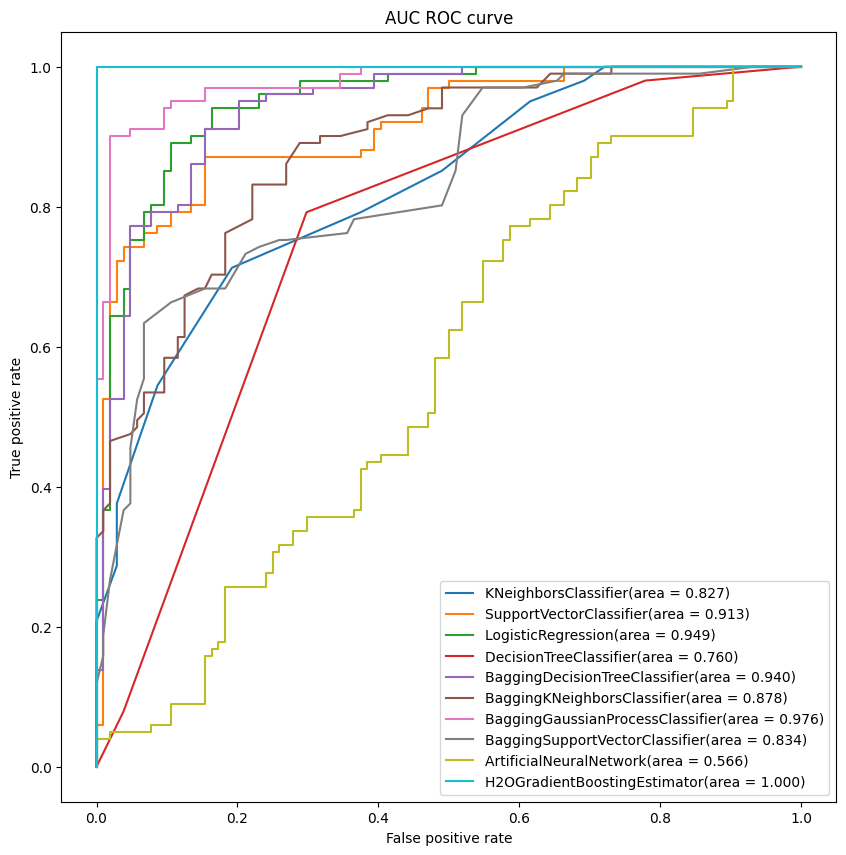

In [ ]:
#AUC ROC

df_td = df.copy()
X = df_td.iloc[:,0:-1].copy()
Y = df_td['target'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2, 
                                                    random_state=123)



plt.figure(1)
plt.rcParams["figure.figsize"] = [10, 5]
for i in range(len(m)+1):

  if i == len(m):
    y_pred = pd.DataFrame(h2o.as_list(best_model.predict(test)))
    y_test = h2o.as_list(test['target'])
    plt.figure(1)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred["p1"])
    auc = metrics.roc_auc_score(y_test, y_pred["p1"])
    plt.plot(fpr, tpr,label=type(best_model).__name__ + '(area = {:.3f})'.format(auc))
    y_pred = 0;y_test=0

  else:
    if type(m[i]).__name__ == "Sequential":
      y_pred = m[i].predict(X_test).ravel()
    else:
      y_pred = m[i].predict_proba(X_test)[:, 1]


    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test,y_pred)
    plt.plot(fpr, tpr, label=str(label[i]) + '(area = {:.3f})'.format(auc))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AUC ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
#best_model.explain(train)

In [ ]:
#best_model.explain(test)

In [ ]:
df_td = df.copy()
X = df_td.iloc[:,0:-1].copy()
Y = df_td['target'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2, 
                                                    random_state=123)

In [ ]:
anndf = pd.DataFrame(
    {
    "ypred": np.zeros(len(y_testk)),
    "y_true": np.zeros(len(y_testk)),
    "y_pred": np.zeros(len(y_testk))
    })
anndf["ypred"] = m[8].predict(X_testk)
anndf["y_true"] = y_testk
for i in range(len(y_testk)):
  if anndf.iloc[i,0] >= 0.5:
    anndf.iloc[i,2] = 1

7/7 [==============================] - 0s 5ms/step


In [ ]:
plt.rcParams["figure.figsize"] = [5, 4]
def CM(i):

  if i <8:
    y_true = y_test
    y_pred = m[i].predict(X_test)

  elif i==8 and type(m[i]).__name__ == 'Sequential':
    y_true = anndf['y_true']
    y_pred = anndf['y_pred']

  elif i==9:
    y_pred = pd.DataFrame(h2o.as_list(best_model.predict(test)))
    y_pred = y_pred["predict"]
    y_true = h2o.as_list(test['target'])
  

  cf_matrix=confusion_matrix(y_true, y_pred)
  group_names = ['True Negative',"False Positive","False Negative","True Positive"]
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  title = "Confusion Matrix of " + label[i]
  sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues').set(
      title = title)
  plt.show()

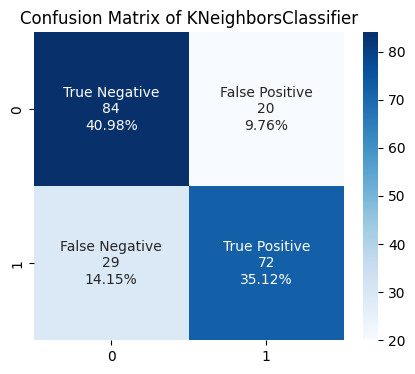

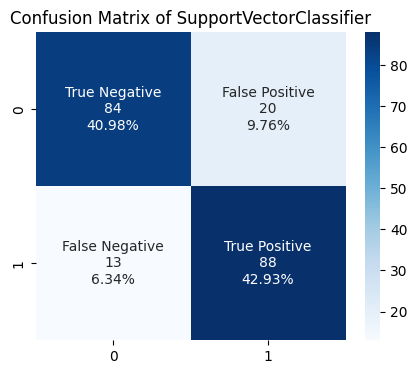

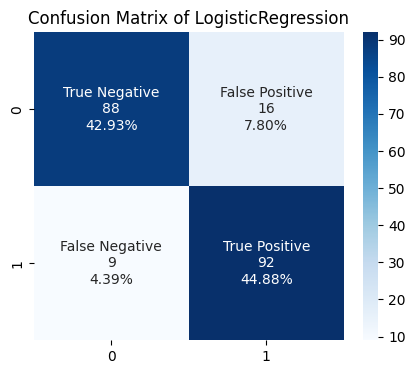

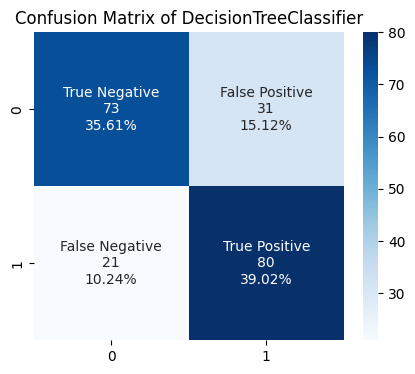

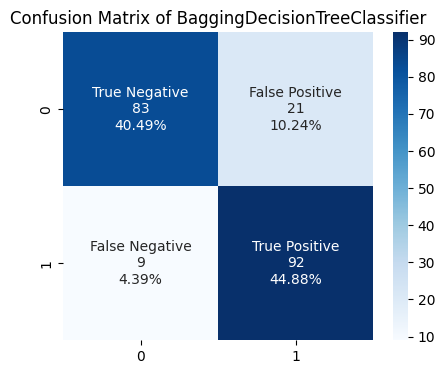

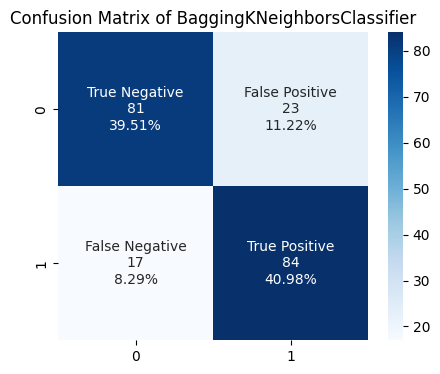

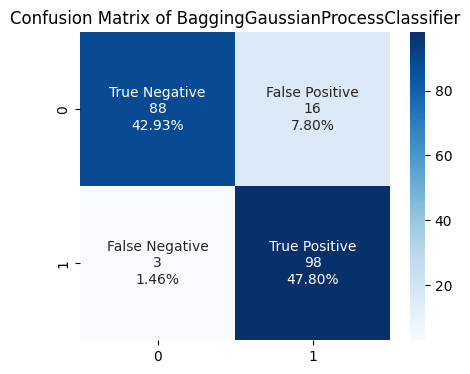

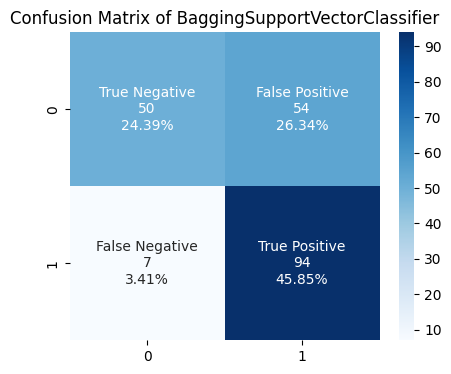

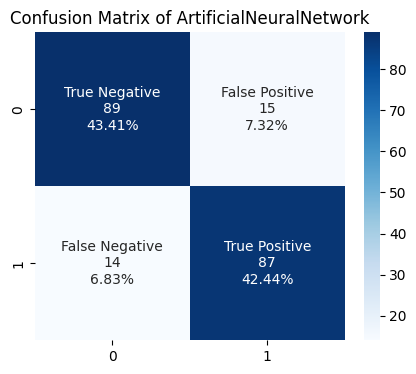

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


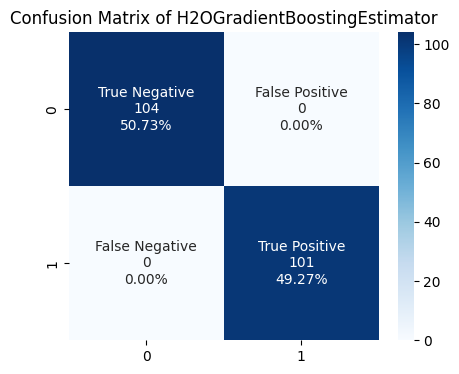

In [ ]:
for i in range(10):
  CM(i)

In [ ]:
from joblib import dump, load

for i in range(9):

  file_name = label[i]+".joblib"
  dump(i, file_name)

In [ ]:
m

[KNeighborsClassifier(n_neighbors=10),
 SVC(C=40, degree=10, kernel='poly', probability=True, random_state=123),
 LogisticRegression(max_iter=1000, random_state=123),
 DecisionTreeClassifier(ccp_alpha=0.02, max_depth=5, max_features='sqrt',
                        random_state=123, splitter='random'),
 BaggingClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.01, max_depth=4,
                                                    max_features='sqrt',
                                                    random_state=123,
                                                    splitter='random'),
                   max_features=3, max_samples=150, n_estimators=100,
                   random_state=123),
 BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=10),
                   max_features=3, max_samples=150, n_estimators=16,
                   random_state=123),
 BaggingClassifier(estimator=GaussianProcessClassifier(), max_features=3,
                   max_samples=150, n_estimat